# Dispersion

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import numpy as np

In [3]:
from lint_analysis.token_offsets import Dataset

In [4]:
death = list(Dataset.from_local('death.json').texts())

In [25]:
md_death = [
    t for t in death
    if 'Moby-Dick' in t.get('title', '')
][0]

In [6]:
def plot_ticks(text, marker='|', color='blue', s=5, title=None):
    
    indexes = np.array(text['offsets']) * text['tokenCount']
    
    plt.figure(figsize=(10, 1))
    plt.axis([0, text['tokenCount'], -1, 1])
    plt.axes().get_yaxis().set_visible(False)
    plt.axhline(0, color='#dddddd', zorder=0)
    plt.xlabel('Word position')
    
    if title:
        plt.title(title)
        
    plt.scatter(
        indexes, np.zeros_like(indexes),
        marker=marker, color=color, zorder=1, s=s,
    )
    
    plt.show()

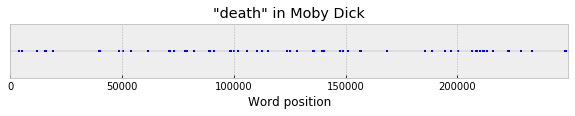

In [7]:
plot_ticks(md_death, title='"death" in Moby Dick')

In [8]:
def plot_sample_ticks(sample, w=10, h=20, marker='.', color='blue', s=2, title=None):
    
    plt.figure(figsize=(w, h))
    plt.axes().get_yaxis().set_visible(False)
    plt.axis([0, 1, -1, len(sample)])
    plt.xlabel('Narrative time')
    
    if title:
        plt.title(title)

    for i, (text) in enumerate(sample):

        plt.scatter(
            text['offsets'], np.full(len(text['offsets']), i),
            color=color, marker=marker, s=s
        )

    plt.show()

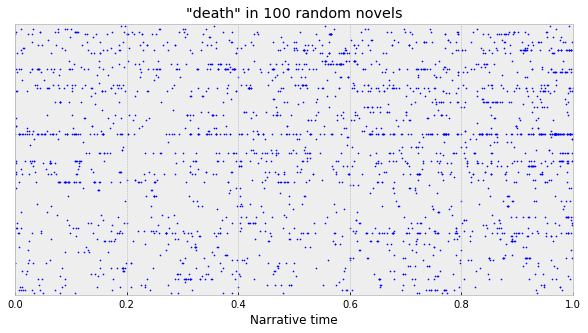

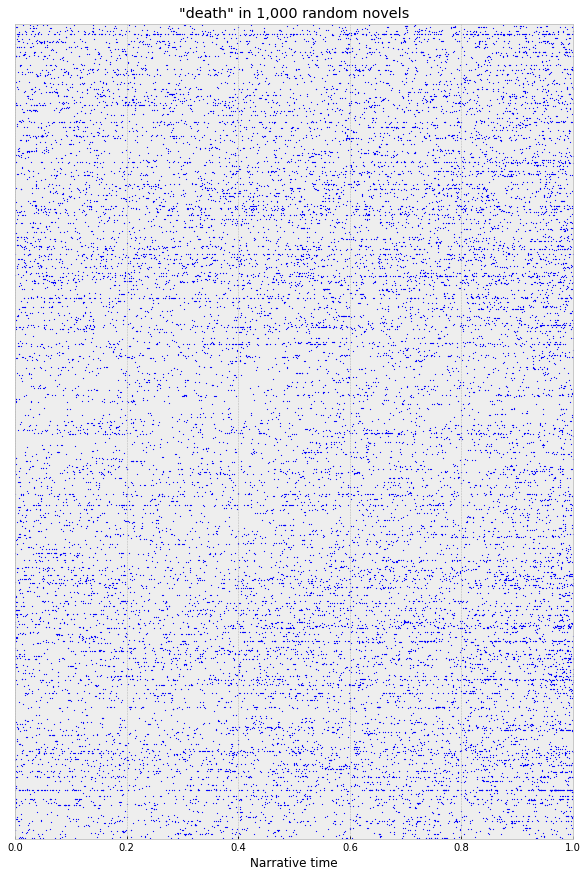

In [9]:
plot_sample_ticks(death[:100], h=5, s=5, title='"death" in 100 random novels')
plot_sample_ticks(death[:1000], h=15, title='"death" in 1,000 random novels')

In [10]:
def plot_sample_histogram(sample, title=None):
    
    offsets = [offset for t in sample for offset in t['offsets']]
    
    plt.figure(figsize=(10, 5))

    if title:
        plt.title(title)

    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.hist(offsets, bins=100, edgecolor='black', zorder=3)
    plt.show()

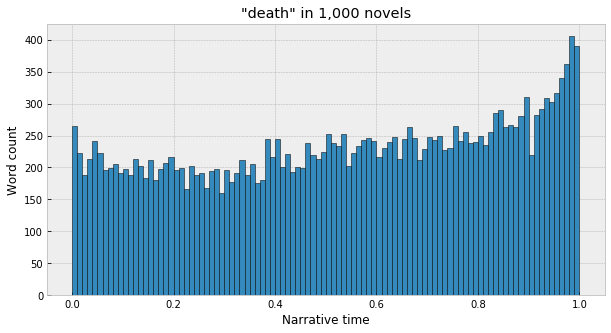

In [11]:
plot_sample_histogram(death[:1000], '"death" in 1,000 novels')

In [5]:
from lint_analysis.bin_counts import cache

In [6]:
def plot_series(token, title=None):
    
    series = cache.token_series(token)
    
    plt.figure(figsize=(10, 5))

    plt.title(title or '"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    
    plt.hist(
        np.arange(len(series)),
        bins=len(series),
        weights=series,
        edgecolor='black',
        zorder=3,
    )
    
    plt.show()

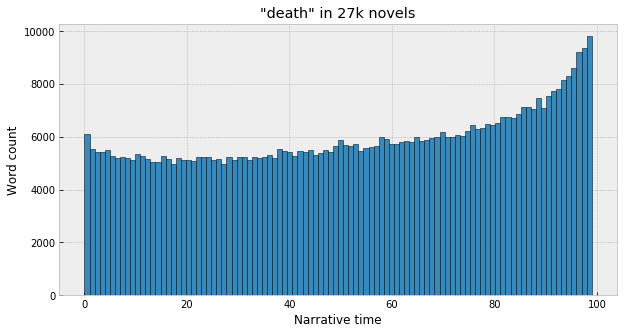

In [16]:
plot_series('death', '"death" in 27k novels')

In [21]:
athletic = list(Dataset.from_local('athletic.json').texts())

In [23]:
md_athletic = [
    t for t in athletic if
    'Moby-Dick' in t.get('title', '')
][0]

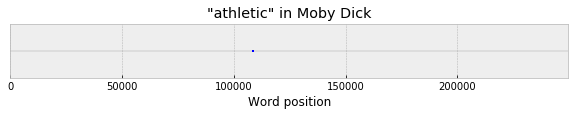

In [24]:
plot_ticks(md_athletic, title='"athletic" in Moby Dick')

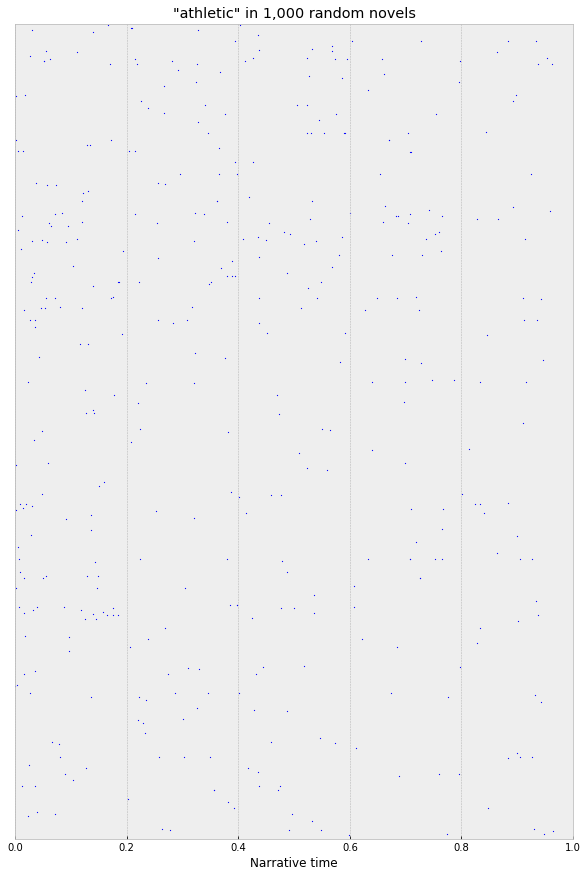

In [27]:
plot_sample_ticks(athletic[:1000], h=15, title='"athletic" in 1,000 random novels')

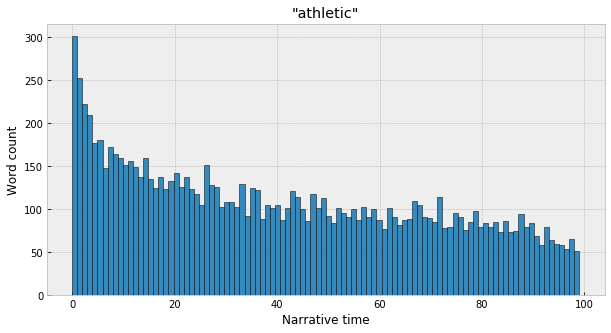

In [28]:
plot_series('athletic')

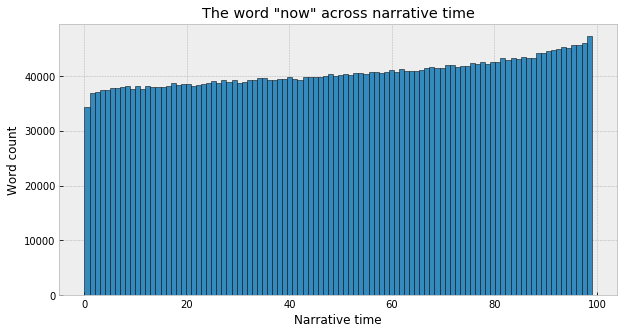

In [10]:
plot_series('now', 'The word "now" across narrative time')